In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#checkpoint = '/Users/cjw/Data/sez/sez_checkpoints/2019-01-31/unet_checkpoint-3000'
checkpoint = '/ssd1/cjw/sez/Checkpoints/2019-02-04-zero-mean/unet_checkpoint-5000'
cpmeta = checkpoint + '.meta'

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cpmeta)
saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from /ssd1/cjw/sez/Checkpoints/2019-02-04-zero-mean/unet_checkpoint-5000


In [4]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    try:
        print(op.name, op.outputs, len(op.outputs))
    except:
        print(op.name, "no output")
    print('------')

init [] 0
------
Placeholder [<tf.Tensor 'Placeholder:0' shape=(?, 256, 256, 3) dtype=float32>] 1
------
Placeholder_1 [<tf.Tensor 'Placeholder_1:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
Placeholder_2 [<tf.Tensor 'Placeholder_2:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/shape [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/min [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/max [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/RandomUniform [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/RandomUniform:0' shape=(5, 5, 3, 16) dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initiali

dropout_2/keep_prob [<tf.Tensor 'dropout_2/keep_prob:0' shape=() dtype=float32>] 1
------
dropout_2/Shape [<tf.Tensor 'dropout_2/Shape:0' shape=(4,) dtype=int32>] 1
------
dropout_2/random_uniform/min [<tf.Tensor 'dropout_2/random_uniform/min:0' shape=() dtype=float32>] 1
------
dropout_2/random_uniform/max [<tf.Tensor 'dropout_2/random_uniform/max:0' shape=() dtype=float32>] 1
------
dropout_2/random_uniform/RandomUniform [<tf.Tensor 'dropout_2/random_uniform/RandomUniform:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
dropout_2/random_uniform/sub [<tf.Tensor 'dropout_2/random_uniform/sub:0' shape=() dtype=float32>] 1
------
dropout_2/random_uniform/mul [<tf.Tensor 'dropout_2/random_uniform/mul:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
dropout_2/random_uniform [<tf.Tensor 'dropout_2/random_uniform:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
dropout_2/add [<tf.Tensor 'dropout_2/add:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
dropout_2/Floor [<tf.Tensor 'dropout_2

decoder-layer-128/kernel/Assign [<tf.Tensor 'decoder-layer-128/kernel/Assign:0' shape=(3, 3, 128, 256) dtype=float32_ref>] 1
------
decoder-layer-128/kernel/read [<tf.Tensor 'decoder-layer-128/kernel/read:0' shape=(3, 3, 128, 256) dtype=float32>] 1
------
decoder-layer-128/bias/Initializer/zeros [<tf.Tensor 'decoder-layer-128/bias/Initializer/zeros:0' shape=(128,) dtype=float32>] 1
------
decoder-layer-128/bias [<tf.Tensor 'decoder-layer-128/bias:0' shape=(128,) dtype=float32_ref>] 1
------
decoder-layer-128/bias/Assign [<tf.Tensor 'decoder-layer-128/bias/Assign:0' shape=(128,) dtype=float32_ref>] 1
------
decoder-layer-128/bias/read [<tf.Tensor 'decoder-layer-128/bias/read:0' shape=(128,) dtype=float32>] 1
------
decoder-layer-128/Shape [<tf.Tensor 'decoder-layer-128/Shape:0' shape=(4,) dtype=int32>] 1
------
decoder-layer-128/strided_slice/stack [<tf.Tensor 'decoder-layer-128/strided_slice/stack:0' shape=(1,) dtype=int32>] 1
------
decoder-layer-128/strided_slice/stack_1 [<tf.Tensor 

decoder-layer-32/strided_slice_1/stack_2 [<tf.Tensor 'decoder-layer-32/strided_slice_1/stack_2:0' shape=(1,) dtype=int32>] 1
------
decoder-layer-32/strided_slice_1 [<tf.Tensor 'decoder-layer-32/strided_slice_1:0' shape=() dtype=int32>] 1
------
decoder-layer-32/strided_slice_2/stack [<tf.Tensor 'decoder-layer-32/strided_slice_2/stack:0' shape=(1,) dtype=int32>] 1
------
decoder-layer-32/strided_slice_2/stack_1 [<tf.Tensor 'decoder-layer-32/strided_slice_2/stack_1:0' shape=(1,) dtype=int32>] 1
------
decoder-layer-32/strided_slice_2/stack_2 [<tf.Tensor 'decoder-layer-32/strided_slice_2/stack_2:0' shape=(1,) dtype=int32>] 1
------
decoder-layer-32/strided_slice_2 [<tf.Tensor 'decoder-layer-32/strided_slice_2:0' shape=() dtype=int32>] 1
------
decoder-layer-32/mul/y [<tf.Tensor 'decoder-layer-32/mul/y:0' shape=() dtype=int32>] 1
------
decoder-layer-32/mul [<tf.Tensor 'decoder-layer-32/mul:0' shape=() dtype=int32>] 1
------
decoder-layer-32/mul_1/y [<tf.Tensor 'decoder-layer-32/mul_1/y:0

concat/values_0 [<tf.Tensor 'concat/values_0:0' shape=(1,) dtype=int32>] 1
------
concat/axis [<tf.Tensor 'concat/axis:0' shape=() dtype=int32>] 1
------
concat [<tf.Tensor 'concat:0' shape=(2,) dtype=int32>] 1
------
Reshape [<tf.Tensor 'Reshape:0' shape=(?, ?) dtype=float32>] 1
------
Softmax [<tf.Tensor 'Softmax:0' shape=(?, ?) dtype=float32>] 1
------
decoder-softmax [<tf.Tensor 'decoder-softmax:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
sce_loss/zeros_like [<tf.Tensor 'sce_loss/zeros_like:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
sce_loss/GreaterEqual [<tf.Tensor 'sce_loss/GreaterEqual:0' shape=(?, 256, 256, 5) dtype=bool>] 1
------
sce_loss/Select [<tf.Tensor 'sce_loss/Select:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
sce_loss/Neg [<tf.Tensor 'sce_loss/Neg:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
sce_loss/Select_1 [<tf.Tensor 'sce_loss/Select_1:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
sce_loss/mul [<tf.Tensor 'sce_loss/mul:0' shape=(?,

------
gradients/concat-32_grad/ShapeN [<tf.Tensor 'gradients/concat-32_grad/ShapeN:0' shape=(4,) dtype=int32>, <tf.Tensor 'gradients/concat-32_grad/ShapeN:1' shape=(4,) dtype=int32>] 2
------
gradients/concat-32_grad/ConcatOffset [<tf.Tensor 'gradients/concat-32_grad/ConcatOffset:0' shape=(4,) dtype=int32>, <tf.Tensor 'gradients/concat-32_grad/ConcatOffset:1' shape=(4,) dtype=int32>] 2
------
gradients/concat-32_grad/Slice [<tf.Tensor 'gradients/concat-32_grad/Slice:0' shape=(?, 64, 64, 32) dtype=float32>] 1
------
gradients/concat-32_grad/Slice_1 [<tf.Tensor 'gradients/concat-32_grad/Slice_1:0' shape=(?, 64, 64, 32) dtype=float32>] 1
------
gradients/concat-32_grad/tuple/group_deps [] 0
------
gradients/concat-32_grad/tuple/control_dependency [<tf.Tensor 'gradients/concat-32_grad/tuple/control_dependency:0' shape=(?, 64, 64, 32) dtype=float32>] 1
------
gradients/concat-32_grad/tuple/control_dependency_1 [<tf.Tensor 'gradients/concat-32_grad/tuple/control_dependency_1:0' shape=(?, 64

gradients/encoder-layer-128-0/Conv2D_grad/tuple/group_deps [] 0
------
gradients/encoder-layer-128-0/Conv2D_grad/tuple/control_dependency [<tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/tuple/control_dependency:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
gradients/encoder-layer-128-0/Conv2D_grad/tuple/control_dependency_1 [<tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/tuple/control_dependency_1:0' shape=(3, 3, 64, 128) dtype=float32>] 1
------
gradients/AddN_4 [<tf.Tensor 'gradients/AddN_4:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
gradients/Relu_5_grad/ReluGrad [<tf.Tensor 'gradients/Relu_5_grad/ReluGrad:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
gradients/encoder-layer-64/BiasAdd_grad/BiasAddGrad [<tf.Tensor 'gradients/encoder-layer-64/BiasAdd_grad/BiasAddGrad:0' shape=(64,) dtype=float32>] 1
------
gradients/encoder-layer-64/BiasAdd_grad/tuple/group_deps [] 0
------
gradients/encoder-layer-64/BiasAdd_grad/tuple/control_dependency [<tf.Tensor 'gradi

encoder-layer-32-0/kernel/adam_opt_1/read [<tf.Tensor 'encoder-layer-32-0/kernel/adam_opt_1/read:0' shape=(3, 3, 16, 32) dtype=float32>] 1
------
encoder-layer-32-0/bias/adam_opt/Initializer/zeros [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt/Initializer/zeros:0' shape=(32,) dtype=float32>] 1
------
encoder-layer-32-0/bias/adam_opt [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt:0' shape=(32,) dtype=float32_ref>] 1
------
encoder-layer-32-0/bias/adam_opt/Assign [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt/Assign:0' shape=(32,) dtype=float32_ref>] 1
------
encoder-layer-32-0/bias/adam_opt/read [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt/read:0' shape=(32,) dtype=float32>] 1
------
encoder-layer-32-0/bias/adam_opt_1/Initializer/zeros [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt_1/Initializer/zeros:0' shape=(32,) dtype=float32>] 1
------
encoder-layer-32-0/bias/adam_opt_1 [<tf.Tensor 'encoder-layer-32-0/bias/adam_opt_1:0' shape=(32,) dtype=float32_ref>] 1
------
encoder-layer-32-0/bias/

decoder-conv-128-2/kernel/adam_opt/Initializer/zeros/shape_as_tensor [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt/Initializer/zeros/shape_as_tensor:0' shape=(4,) dtype=int32>] 1
------
decoder-conv-128-2/kernel/adam_opt/Initializer/zeros/Const [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt/Initializer/zeros/Const:0' shape=() dtype=float32>] 1
------
decoder-conv-128-2/kernel/adam_opt/Initializer/zeros [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt/Initializer/zeros:0' shape=(3, 3, 128, 128) dtype=float32>] 1
------
decoder-conv-128-2/kernel/adam_opt [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt:0' shape=(3, 3, 128, 128) dtype=float32_ref>] 1
------
decoder-conv-128-2/kernel/adam_opt/Assign [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt/Assign:0' shape=(3, 3, 128, 128) dtype=float32_ref>] 1
------
decoder-conv-128-2/kernel/adam_opt/read [<tf.Tensor 'decoder-conv-128-2/kernel/adam_opt/read:0' shape=(3, 3, 128, 128) dtype=float32>] 1
------
decoder-conv-128-2/kernel/adam_opt_1/Ini

decoder-conv-16-2/bias/adam_opt [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt:0' shape=(16,) dtype=float32_ref>] 1
------
decoder-conv-16-2/bias/adam_opt/Assign [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt/Assign:0' shape=(16,) dtype=float32_ref>] 1
------
decoder-conv-16-2/bias/adam_opt/read [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt/read:0' shape=(16,) dtype=float32>] 1
------
decoder-conv-16-2/bias/adam_opt_1/Initializer/zeros [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt_1/Initializer/zeros:0' shape=(16,) dtype=float32>] 1
------
decoder-conv-16-2/bias/adam_opt_1 [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt_1:0' shape=(16,) dtype=float32_ref>] 1
------
decoder-conv-16-2/bias/adam_opt_1/Assign [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt_1/Assign:0' shape=(16,) dtype=float32_ref>] 1
------
decoder-conv-16-2/bias/adam_opt_1/read [<tf.Tensor 'decoder-conv-16-2/bias/adam_opt_1/read:0' shape=(16,) dtype=float32>] 1
------
decoder-layer-5/kernel/adam_opt/Initializer/zeros [<tf.Tensor 'de

------
save/Assign_142 [<tf.Tensor 'save/Assign_142:0' shape=(64,) dtype=float32_ref>] 1
------
save/Assign_143 [<tf.Tensor 'save/Assign_143:0' shape=(3, 3, 32, 64) dtype=float32_ref>] 1
------
save/Assign_144 [<tf.Tensor 'save/Assign_144:0' shape=(3, 3, 32, 64) dtype=float32_ref>] 1
------
save/Assign_145 [<tf.Tensor 'save/Assign_145:0' shape=(3, 3, 32, 64) dtype=float32_ref>] 1
------
save/Assign_146 [<tf.Tensor 'save/Assign_146:0' shape=(64,) dtype=float32_ref>] 1
------
save/Assign_147 [<tf.Tensor 'save/Assign_147:0' shape=(64,) dtype=float32_ref>] 1
------
save/Assign_148 [<tf.Tensor 'save/Assign_148:0' shape=(64,) dtype=float32_ref>] 1
------
save/Assign_149 [<tf.Tensor 'save/Assign_149:0' shape=(3, 3, 64, 64) dtype=float32_ref>] 1
------
save/Assign_150 [<tf.Tensor 'save/Assign_150:0' shape=(3, 3, 64, 64) dtype=float32_ref>] 1
------
save/Assign_151 [<tf.Tensor 'save/Assign_151:0' shape=(3, 3, 64, 64) dtype=float32_ref>] 1
------
save/restore_all [] 0
------


In [4]:
decoder = sess.graph.get_tensor_by_name('decoder-softmax:0')
images = sess.graph.get_tensor_by_name('Placeholder:0')

In [9]:
# data_raw = imread('/Users/cjw/Data/sez/RawTifs/10_hours_punched_overnight/NDExp_Point0017_Seq0017.tif')
data_raw = imread('/ssd1/cjw/Data/sez/RawTifs/16_hours_punched_overnight/NDExp_Point0008_Seq0008.tif')
dmin = data_raw.min(axis=(0,1),keepdims=True)
dmax = data_raw.max(axis=(0,1),keepdims=True)
#data = (data_raw - dmin)/(dmax - dmin)

ymean = data_raw.mean(axis=(0,1), keepdims=True)
ystd = data_raw.std(axis=(0,1), keepdims=True)
#test_tif = (test_tif - ymin)/(ymax - ymin + 0.00001)
data = (data_raw - ymean)/ystd

plt.figure(figsize=(12,12))
plt.imshow(data)
print(data_raw.shape, dmin.shape, dmax.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2044, 2048, 3) (1, 1, 3) (1, 1, 3)


In [10]:
def decode(patches):
    ds = sess.run(decoder, feed_dict={images:patches})
    return ds

        
def image_to_patches(image, w):
    
    ny, nx, nc = image.shape
    
    patch_list = list()
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    while xok:
        yok = True
        ymax = 0
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            #print(ys, ymax, yok, xs, xmax, xok)
            p = np.expand_dims(image[ys:ymax, xs:xmax, :], 0)
            patch_list.append(p)
    
    patches = np.concatenate(patch_list, axis=0)
    print(patches.shape)
    return  patches

def patches_to_image(patches, w, nx, ny):
    
    image = np.zeros((ny, nx, patches.shape[-1]), dtype=patches.dtype)
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    patch_index = 0
    while xok:
        ymax = 0
        yok = True
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            image[ys:ymax, xs:xmax, :] = patches[patch_index]
            patch_index += 1
            #print(patch_index, ys, ymax, xs, xmax, yok, xok)
    return image

In [11]:
import time

t1 = time.time()
p = image_to_patches(data, 256)
d2 = data[128:, 128:, :]
p2 = image_to_patches(d2, 256)
dp = decode(p)
dp2 = decode(p2)
ndp = dp.shape[0]

r1 = patches_to_image(dp, 256, data.shape[1] , data.shape[0])
r2 = patches_to_image(dp2, 256, data.shape[1] - 128, data.shape[0] - 128)

rr2 = r1*0
rr2[128:, 128:, :] = r2

rstack = np.stack((r1, rr2), axis=0)

r = rstack.max(axis=0)

print(time.time()  - t1)


(64, 256, 256, 3)
(64, 256, 256, 3)
1.0302443504333496


(2044, 2048, 5)


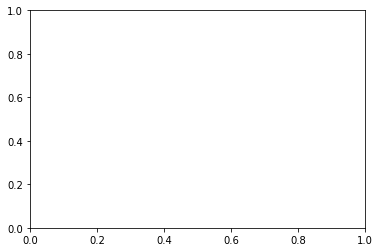

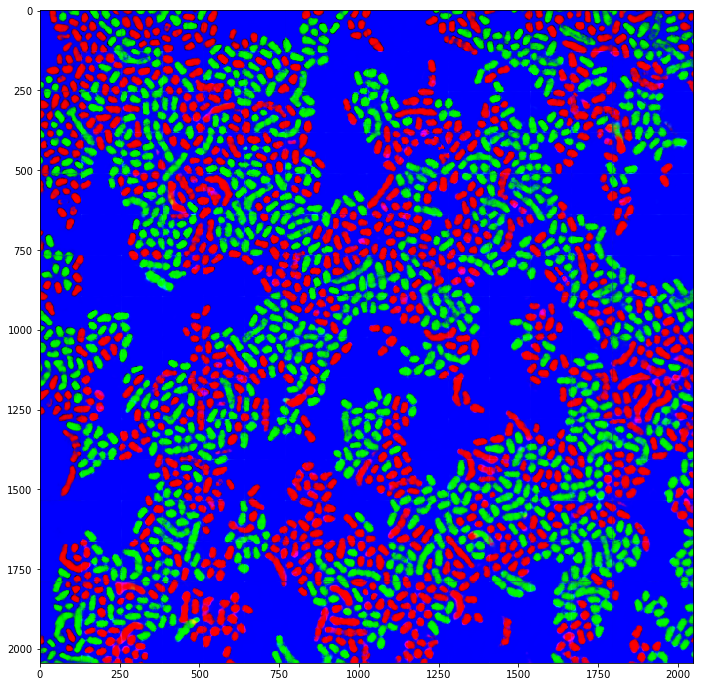

In [13]:
plt.cla()
tr = r# > .8
#tr = tr.astype(np.int32)
#tr = 255*tr
print(tr.shape)
plt.figure(figsize=(12, 12))
plt.imshow(tr[:,:,0:3])
plt.show()


In [14]:
import tifffile
tifffile.imsave('/Users/cjw/Projects/sez/unetout0008-zm.tif', np.moveaxis(r, -1, 0))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cjw/Projects/sez/unetout0008-zm.tif'